<a href="https://colab.research.google.com/github/AhlemKaabi/holbertonschool-machine_learning/blob/main/supervised_learning/0x0E-time_series/Time_Series_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
import seaborn as sn

---
Loding Dataset

---

In [ ]:
coinbaseUSD = pd.read_csv('/content/drive/MyDrive/Time_series/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

print('Total number of days present in the dataset: ',coinbaseUSD.shape[0])
print('Total number of fields present in the dataset: ',coinbaseUSD.shape[1])

Total number of days present in the dataset:  2099760
Total number of fields present in the dataset:  8


In [ ]:
coinbaseUSD.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the Dataset

---
Check for Total existing Null values

---

In [ ]:
print('Null Values:',coinbaseUSD.isnull().values.sum())
print('NA values:',coinbaseUSD.isnull().values.any())

coinbaseUSD.isnull().sum()

Null Values: 763483
NA values: True


Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

---
Decode Timestamp

---



In [ ]:
dataframe = coinbaseUSD.copy()
dataframe['Timestamp'] = dataframe['Timestamp'].apply(lambda x: datetime.fromtimestamp(x))
dataframe.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
remove NAN values using "forward fill method", according to the results we may try other methods!

---

In [ ]:
df = dataframe.ffill(axis=0)
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
df.head(30)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,2014-12-01 05:35:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,2014-12-01 05:36:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,2014-12-01 05:37:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
5,2014-12-01 05:38:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
6,2014-12-01 05:39:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
7,2014-12-01 05:40:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,2014-12-01 05:41:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
9,2014-12-01 05:42:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


---
Printing the start date and End date of the dataset

---



In [ ]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]

print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-12-01 05:33:00
Ending Date 2019-01-07 22:06:00




---


Transform the dataframe from 1 min row data to 60 min row data! (since our data tratrts with 33 min the first 27 rows are not important to keep!)

---



In [ ]:
data = df.copy()
# data[start at index 27: till the end : with step of 60 min]
data = data[27::60]
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
27,2014-12-01 06:00:00,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
87,2014-12-01 07:00:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
147,2014-12-01 08:00:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
207,2014-12-01 09:00:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
267,2014-12-01 10:00:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0


---
Features correlation to decide which data to work with!

---

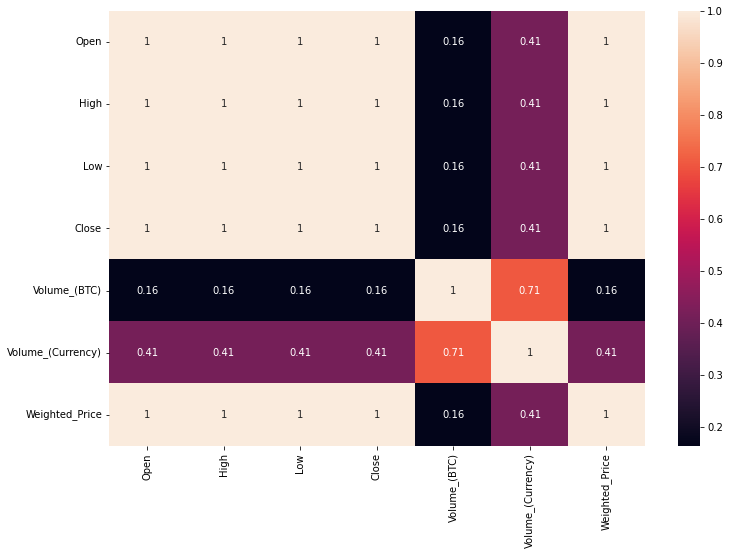

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sn.heatmap(correlation_matrix, annot=True)
plt.show()

---
Reduce the data keep only Timestamp and Close

---

In [ ]:
data = data[['Timestamp', 'Close']] # we can also use the data.drop("feature_column_name",axis=1,inplace=True) method

data = data.set_index('Timestamp')
data.head()

,Close
Timestamp,
2014-12-01 06:00:00,300.0
2014-12-01 07:00:00,370.0
2014-12-01 08:00:00,370.0
2014-12-01 09:00:00,370.0
2014-12-01 10:00:00,370.0


---
Plotting the final dataset cleaned

---

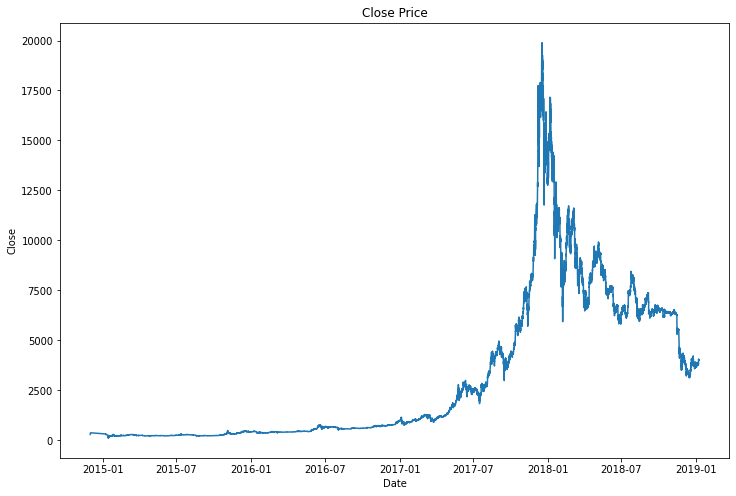

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data['Close'])
plt.ylabel('Close')
plt.xlabel('Date')
plt.title('Close Price')
plt.show()

# Preparing the dataset for the model

---
Spliting the dataset

---

In [ ]:
def split_data(data, split_size=0.75):
  """ Method to split the data into training dataset and test dataset """
  n = len(data)
  train_d = data[:int(n * split_size)]
  test_d = data[int(n * split_size):]
  return train_d, test_d

In [ ]:
train_d, test_d = split_data(data)

In [ ]:
print(train_d.index.max())
print(test_d.index.min()) # the end of one is the start of the other!

2018-01-08 08:34:00
2018-01-08 09:34:00


In [ ]:
def plot_data(train_d, test_d):
  """ Method to plot the training dataset and the test dataset """
  plt.figure(figsize=(12, 8))
  plt.plot(train_d)
  plt.plot(test_d)
  plt.show()

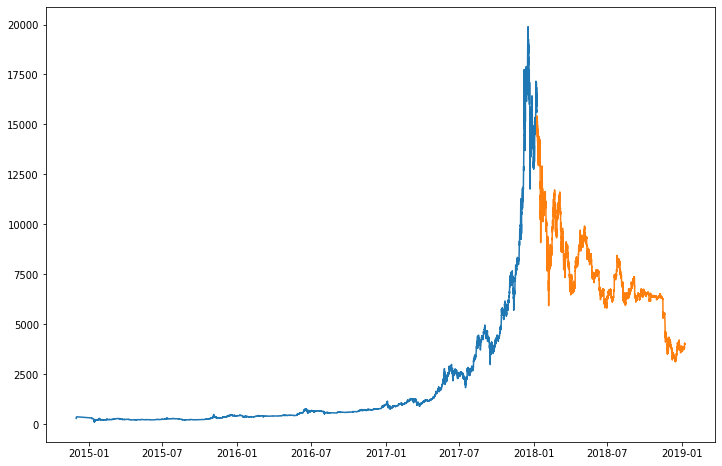

In [ ]:
plot_data(train_d, test_d)

---
Normalizing the dataset

---

In [ ]:
def normalize(train_d, test_d):
  """ Normalize dataset """
  train_mean = train_d.mean()
  train_std = train_d.std()

  train_d = (train_d - train_mean) / train_std
  test_d = (test_d - train_mean) / train_std

  return train_d, test_d

In [ ]:
train_d, test_d = normalize(train_d, test_d)

---
Windowing the dataset

The models will make a set of predictions based on a window of consecutive samples from the data.

window = (input data) + (label for the input data)

*   input data = sequence of 24 hour data
*   label for the input data = next hour data


---

In [ ]:
# window/sequence length = input data length(24) + label for the input data length(1)
INUPT_WIDTH = 24 # window
LABEL_WIDTH = 1

In [ ]:
def split_window(data):
  """
  Method to convert a list of consecutive inputs (data)
  into a window of inputs and a window of output labels.
  """
  input_slice = slice(0, INUPT_WIDTH)
  output_slice = slice(INUPT_WIDTH, None)
  # data[batche size, number of time steps , feature( 'Close' in our case)]
  inputs = data[:, input_slice, :] # (batch size, timestamp, input window)
  outputs = data[:, output_slice, :] # # (batch size, timestamp, label window)

  return inputs, outputs

In [ ]:
BATCH_SIZE = 64

In [ ]:
def make_dataset(df):
  """
  Method to make a dataset that can fit a model
  """
  data = np.array(df, dtype=np.float32) # convert the dataframe to a numpy array
  # data contains both windows and labels dataset => target = None
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=INUPT_WIDTH + LABEL_WIDTH,
      sequence_stride=1,
      shuffle=True,
      batch_size=BATCH_SIZE
  )
  # we will get the shape of each item as shape=(64, 25, 1)
  ds = ds.map(split_window)
  # we will get a items as yètuple of 2 items (shape=(64, 24, 1), shape=(64, 1, 1))

  return ds

In [ ]:
train_ds = make_dataset(train_d)
test_ds = make_dataset(test_d)

In [ ]:
for batch, (window_input, window_label) in enumerate(train_ds.take(1)):
  print(window_label[batch].numpy())

[[-0.47798675]]


# Model and Training

A **metric** is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

In [80]:
EPOCHS = 6

In [81]:
def compile_and_fit(model, train_ds, test_ds, patience=2):

  model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()]
  )

  early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=patience,
    mode='min'
  )
  history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=test_ds,
    callbacks=[early_stopping]
  )
  return history

---
Baseline model

---

In [82]:
model = K.models.Sequential([
                             K.layers.LSTM(32, return_sequences=False),
                             K.layers.Dense(units=1)
                             ])

In [83]:
history = compile_and_fit(model, train_ds, test_ds)

Epoch 1/6
410/410 [==============================] - 19s 37ms/step - loss: 0.0411 - mean_absolute_error: 0.0475 - val_loss: 0.0030 - val_mean_absolute_error: 0.0390
Epoch 2/6
410/410 [==============================] - 16s 38ms/step - loss: 0.0011 - mean_absolute_error: 0.0126 - val_loss: 0.0033 - val_mean_absolute_error: 0.0431
Epoch 3/6
410/410 [==============================] - 12s 30ms/step - loss: 0.0010 - mean_absolute_error: 0.0107 - val_loss: 0.0023 - val_mean_absolute_error: 0.0310
Epoch 4/6
410/410 [==============================] - 9s 21ms/step - loss: 9.4168e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0060 - val_mean_absolute_error: 0.0662
Epoch 5/6
410/410 [==============================] - 9s 21ms/step - loss: 8.0647e-04 - mean_absolute_error: 0.0089 - val_loss: 0.0016 - val_mean_absolute_error: 0.0249
Epoch 6/6
410/410 [==============================] - 9s 21ms/step - loss: 7.7241e-04 - mean_absolute_error: 0.0088 - val_loss: 0.0049 - val_mean_absolute_error: 0.0582


# Performance

In [ ]:
def plot_performance(history):
  """ Method to plot the performance of a model """
  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error'])
  plt.ylabel('MAE')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper_left')
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


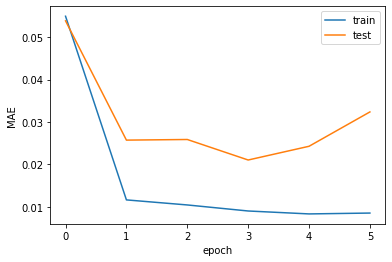

In [ ]:
plot_performance(history)

In [ ]:
def plot_graph(model):
  plt.figure(figsize=(12, 8))
  train_ds.shuffle(buffer_size=len(train_d))
  for batch, (window_input, window_label) in enumerate(train_ds.take(6)):
    plt.subplot(3, 3, batch+1)
    prediction = model.predict(window_input)[batch]
    plt.plot(list(range(INUPT_WIDTH)), window_input[batch, :, -1]) # real 24h data
    plt.plot(INUPT_WIDTH, window_label[batch].numpy(), 'g^', label='label') # lable of that real 24h data
    plt.plot(INUPT_WIDTH, prediction, 'r+', label='prediction')
    plt.legend()


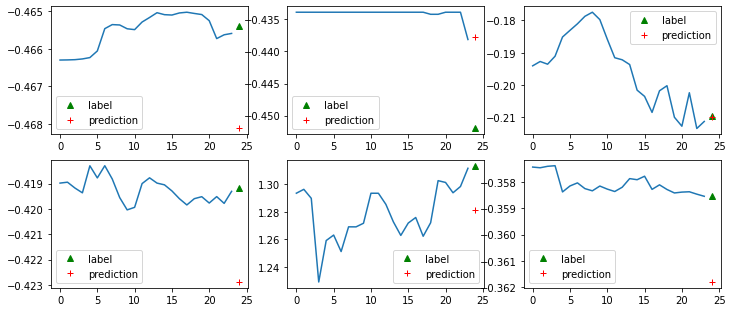

In [ ]:
plot_graph(model)